In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Correlation Matrix

In [2]:
# load the dataset
df1 = pd.read_csv('Final Yield_Weather (Mindanao).csv')
df1.head(3)

,Unnamed: 0,Year,Location,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),surface_pressure (hPa),et0_fao_evapotranspiration (mm),...,soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²),rain (mm),weathercode (wmo code),windgusts_10m (km/h),cloudcover (%),Production (mt),Area (ha),Yield (mt/ha)
0,0,1990,AGUSAN DEL NORTE,6,4.1,25.15,78.36,20.88,975.30,0.16,...,0.28,140.02,70.89,1701.0,1,9.4,100,226.68,200.0,1.133400
1,1,1991,AGUSAN DEL NORTE,8,3.1,25.06,77.99,20.73,975.55,0.16,...,0.27,138.79,73.80,1634.2,1,11.5,100,231.68,204.0,1.135686
2,2,1992,AGUSAN DEL NORTE,8,3.1,25.39,74.29,20.11,975.90,0.17,...,0.21,144.62,73.53,1433.2,1,7.9,100,219.08,199.0,1.100905


In [3]:
df1 = df1.drop(columns=['Unnamed: 0', 'Production (mt)', 'Area (ha)', 'Location', 'Year'])

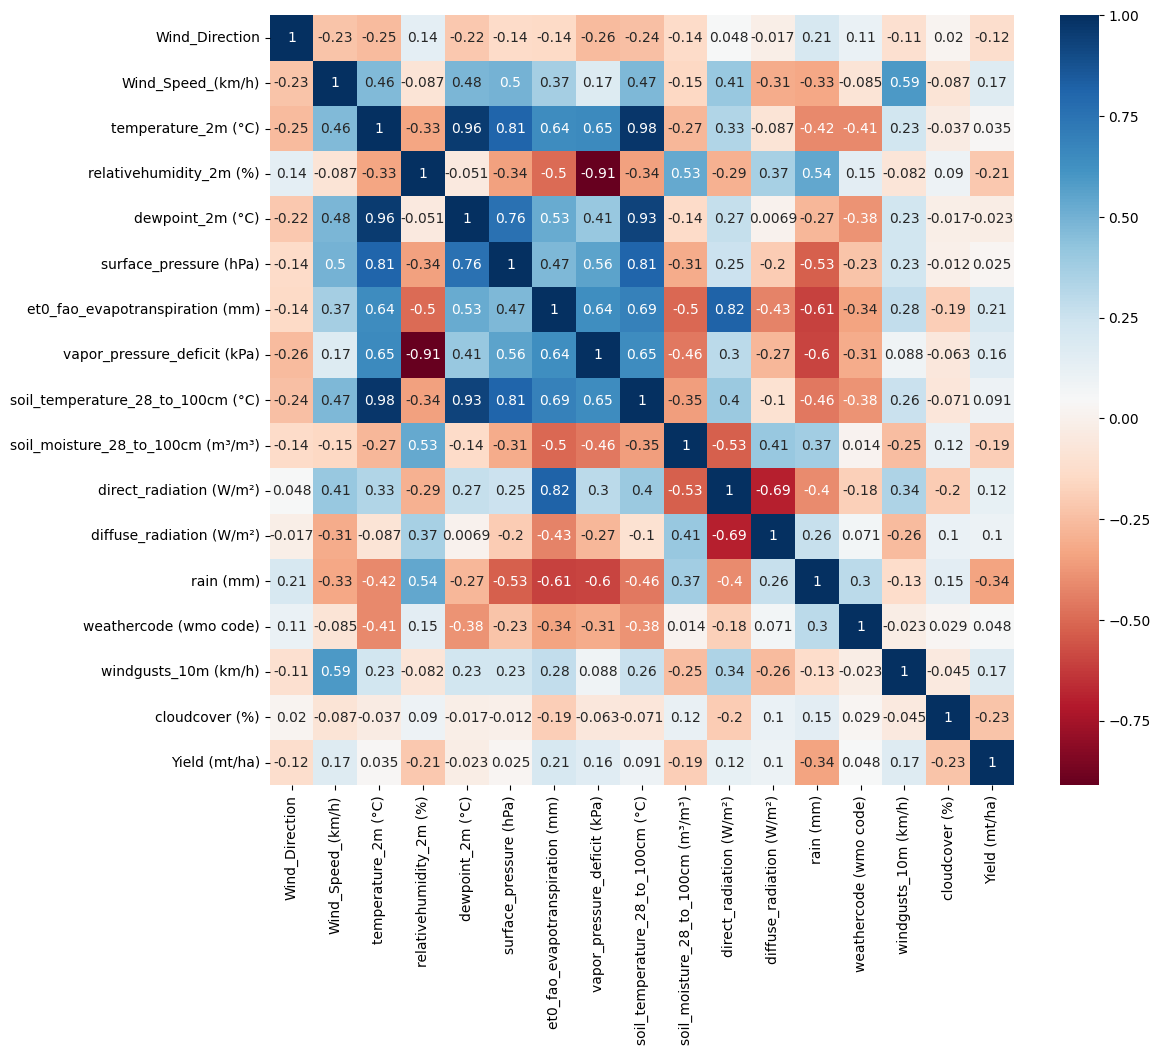

In [4]:
#Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

## VIF

In [5]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']

In [6]:
# Calculate VIF using the features in x
def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Vif value : ', a)
        if(vif[a]<=thresh):
            break
        if(i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return(output)
    
selected_features = cal_vif(x)
selected_features.head()

Iteration no  1
[5.108596670620673, 9.206350553021126, 391472.10113619256, 7258.776815797614, 222391.56840470497, 6354.618122121194, 2844.131007483653, 5493.624962305466, 7540.271299056796, 93.62298499096015, 1329.3126398518225, 2144.0612949547476, 26.807063489663562, 1.753960918781505, 19.568488088102953, 412.4989561630058]
Vif value :  2
Iteration no  2
[5.100516179461699, 8.689712079578149, 7013.511321375793, 3452.3304724498366, 4810.776326175592, 2669.7081416562337, 278.26719485353493, 7484.626311478724, 91.64657260396913, 1051.0935575028923, 1733.7712907138043, 22.555432019190192, 1.7470432557094835, 19.55771414720968, 412.31545375639905]
Vif value :  7
Iteration no  3
[5.013115259704919, 8.67777756264265, 6948.801546690264, 552.3727928484257, 4496.069506003647, 2667.5046022313595, 249.06081856936, 82.35610878712009, 1002.384989423343, 1530.465956865437, 22.50244652782909, 1.742659962244903, 19.50835362572042, 409.46299026152883]
Vif value :  2
Iteration no  4
[4.799776024280143, 

,Wind_Direction,Wind_Speed_(km/h),rain (mm),weathercode (wmo code)
0,6,4.1,1701.0,1
1,8,3.1,1634.2,1
2,8,3.1,1433.2,1
3,8,3.6,2017.8,1
4,6,3.6,1722.0,1


In [7]:
# Creating a new DataFrame with the selected subset of columns
vif = df1.loc[:, ['Wind_Direction', 'Wind_Speed_(km/h)', 'rain (mm)', 'weathercode (wmo code)','Yield (mt/ha)']]
vif

,Wind_Direction,Wind_Speed_(km/h),rain (mm),weathercode (wmo code),Yield (mt/ha)
0,6,4.1,1701.0,1,1.133400
1,8,3.1,1634.2,1,1.135686
2,8,3.1,1433.2,1,1.100905
3,8,3.6,2017.8,1,1.140246
4,6,3.6,1722.0,1,1.144663
...,...,...,...,...,...
744,7,4.0,3683.2,1,0.842097
745,7,4.0,2665.7,1,0.847581
746,7,4.0,2253.2,1,0.844762
747,7,2.5,3017.7,1,0.878906


In [8]:
vif.to_csv('VIF(rawData).csv')

## Random Forest

In [9]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [10]:
# Split dataset into training and testing sets
X = df1.drop('Yield (mt/ha)', axis=1)
y = df1['Yield (mt/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [11]:
# Initialize a RFR with 100 decision trees
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
# Measure how much a feature contributes to the model
rf.feature_importances_

array([2.61362470e-02, 5.73329524e-02, 4.78376442e-02, 5.72073001e-02,
       7.24652672e-02, 2.02966335e-01, 7.13189110e-03, 2.76518199e-02,
       3.70886973e-02, 3.69899626e-02, 4.07302954e-02, 5.64135776e-02,
       2.64894589e-01, 1.12245517e-02, 5.39062566e-02, 2.26130147e-05])

Text(0.5, 0, 'Random Forest Feature Importance')

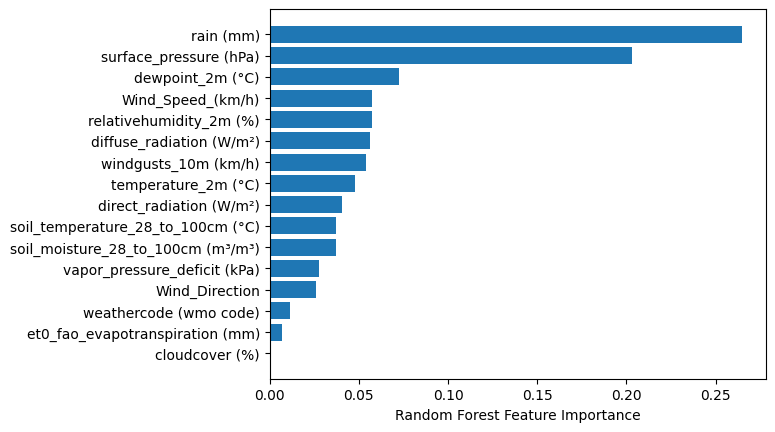

In [13]:
# Visualize the feature importances
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df1.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [14]:
df1.columns

Index(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'surface_pressure (hPa)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'rain (mm)', 'weathercode (wmo code)',
       'windgusts_10m (km/h)', 'cloudcover (%)', 'Yield (mt/ha)'],
      dtype='object')

In [16]:
# Create new DataFrame to be used for modeling
randomForest = df1.loc[:, ['rain (mm)', 'surface_pressure (hPa)', 'dewpoint_2m (°C)', 'Wind_Speed_(km/h)', 'relativehumidity_2m (%)','Yield (mt/ha)']]
randomForest

,rain (mm),surface_pressure (hPa),dewpoint_2m (°C),Wind_Speed_(km/h),relativehumidity_2m (%),Yield (mt/ha)
0,1701.0,975.30,20.88,4.1,78.36,1.133400
1,1634.2,975.55,20.73,3.1,77.99,1.135686
2,1433.2,975.90,20.11,3.1,74.29,1.100905
3,2017.8,975.66,20.94,3.6,79.60,1.140246
4,1722.0,975.32,20.96,3.6,79.45,1.144663
...,...,...,...,...,...,...
744,3683.2,987.28,23.24,4.0,87.04,0.842097
745,2665.7,987.30,23.25,4.0,86.33,0.847581
746,2253.2,988.14,22.96,4.0,84.28,0.844762
747,3017.7,987.71,23.20,2.5,84.89,0.878906


In [17]:
randomForest.to_csv('RandomForest(rawData).csv')

## Sequential Feature Selection

In [18]:
# Importing libraries for Sequential Feature Selction
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB

In [19]:
# Splitting dataset into training and testing sets
X = df1.drop('Yield (mt/ha)', axis=1).astype(int)
y = df1['Yield (mt/ha)'].astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
# Selecting top four features 
selector = SequentialFeatureSelector(GaussianNB() ,n_features_to_select=4, direction='forward', scoring="roc_auc", cv=5)

selector.fit_transform(X_train,y_train)

C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\Angel\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:

array([[ 0,  4, 24, 81],
       [ 4,  3, 22, 86],
       [ 8,  2, 25, 88],
       ...,
       [ 3, 10, 26, 81],
       [ 9,  3, 24, 88],
       [ 4, 13, 26, 86]])

In [21]:
selector

SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select=4,
                          scoring='roc_auc')

In [22]:
# Extracting the names of the selected features
feature_names = np.array(df1.drop('Yield (mt/ha)',axis=1).columns.tolist())
feature_names[selector.get_support()]

array(['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)'], dtype='<U33')

In [23]:
# Create new DataFrame to be used for modeling
SFF = df1.loc[:, ['Wind_Direction', 'Wind_Speed_(km/h)', 'temperature_2m (°C)','relativehumidity_2m (%)','Yield (mt/ha)']]
SFF

,Wind_Direction,Wind_Speed_(km/h),temperature_2m (°C),relativehumidity_2m (%),Yield (mt/ha)
0,6,4.1,25.15,78.36,1.133400
1,8,3.1,25.06,77.99,1.135686
2,8,3.1,25.39,74.29,1.100905
3,8,3.6,24.92,79.60,1.140246
4,6,3.6,24.96,79.45,1.144663
...,...,...,...,...,...
744,7,4.0,25.65,87.04,0.842097
745,7,4.0,25.80,86.33,0.847581
746,7,4.0,25.98,84.28,0.844762
747,7,2.5,26.09,84.89,0.878906


In [25]:
SFF.to_csv('SFF(rawData).csv')